# Regularization

- Avoid overfitting by penalizing high-valued regression coefficients. 
- reduces parameters and shrinks (simplifies) the model.
- L1 regularization adds an L1 penalty equal to the absolute value of the magnitude of coefficients (Lasso). Yield sparsity (Alot 0, a few value). 
- L2 regularization adds an L2 penalty equal to the square of the magnitude of coefficients (Ridge)

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.pipeline import Pipeline
plt.style.use('ggplot')
%matplotlib inline

In [18]:
boston = datasets.load_boston()

X_pre = boston.data
y = boston.target

### First without regularization. I add polynomial feature to make the score worse

In [20]:
# Add polynomail feature to make the score lower, 
# so that i can then use regularization show better result
poly = PolynomialFeatures(degree=2, include_bias=False)
scal = MinMaxScaler()
pipe = Pipeline([('scal',scal),('poly',poly)])
X = pipe.fit_transform(X_pre)

In [26]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.60577548929356673

### L2 norm (ridge)

![](https://sebastianraschka.com/images/faq/regularized-logistic-regression-performance/regularized.png)

In [29]:
# Better result. Change alpha to control how tight you want it to be
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print('train',ridge.score(X_train, y_train))
print('test',ridge.score(X_test,y_test))

train 0.88605785604
test 0.752713960031


### Now lets draw a graph to show how the coef of your attribute changes when alpha changes

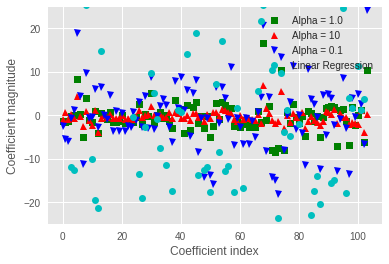

In [38]:
#So if alpha increase, the magnitude of coef is all closer to zero. 
#Means more regularization being applied
ridge = Ridge(alpha=1.0).fit(X_train,y_train)
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)

fig, ax = plt.subplots()
ax.plot(ridge.coef_,'gs',label ='Alpha = 1.0')
ax.plot(ridge10.coef_,'r^',label='Alpha = 10')
ax.plot(ridge01.coef_,'bv',label='Alpha = 0.1')
ax.plot(lr.coef_,'co',label='Linear Regression')
ax.set_xlabel('Coefficient index')
ax.set_ylabel('Coefficient magnitude')
ax.set_ylim(-25,25)
ax.legend(loc = 'upper right')

### Lasso Regression (top one)

![](https://i.stack.imgur.com/P7L3x.png)

In [46]:
# Same theory. It creates sparsity.
lass = Lasso(alpha=0.1)
lass.fit(X_train, y_train)
lass.score(X_test,y_test)

0.63020094063248877

In [53]:
# Many of the coef are now zeros
print('number of coef',lass.coef_.shape)
print('number of coef not equal to zero',(lass.coef_!=0).sum())
print('\n',lass.coef_)

number of coef (104,)
number of coef not equal to zero 8

 [ -0.           0.          -0.           0.          -0.           0.          -0.
  -0.          -0.          -0.          -6.94791033   0.         -15.73526712
  -0.           0.          -0.           0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.          -0.           0.
  -0.           0.           0.           0.           0.          -0.           0.
  -0.          -0.           0.          -0.          -0.           0.          -0.
  -0.          -0.          -0.          -0.          -0.          -0.          -0.
  -0.           0.           0.           0.           0.           0.           0.
   0.           0.           1.57250048   0.          -0.06794425  -0.          -0.
  -0.          -0.          -0.          -0.          -0.          -0.
  19.43341184  -0.          -0.          -0.          -5.13377204  -0.
   5.34522643  -0.          -0.          -0.    

## Logistic Regression can be regularize too

In [59]:
from sklearn.linear_model import LogisticRegression

In [57]:
breast = datasets.load_breast_cancer()
X_pre = breast.data
y = breast.target

In [58]:
X_train, X_test, y_train, y_test =  train_test_split(X_pre,y,random_state=42, stratify = y)

In [60]:
log = LogisticRegression(penalty='l2',C=1.0)
log100 = LogisticRegression(C=100)
log001 = LogisticRegression(C=0.01)
log.fit(X_train,y_train)
log100.fit(X_train,y_train)
log001.fit(X_train,y_train)

print('C=1.0, train',log.score(X_train,y_train))
print('C=1.0, test',log.score(X_test,y_test))
print()
print('C=100.0, train',log100.score(X_train,y_train))
print('C=100.0, test',log100.score(X_test,y_test))
print()
print('C=0.001, train',log001.score(X_train,y_train))
print('C=0.001, test',log001.score(X_test,y_test))

C=1.0, train 0.953051643192
C=1.0, test 0.958041958042

C=100.0, train 0.971830985915
C=100.0, test 0.965034965035

C=0.001, train 0.934272300469
C=0.001, test 0.93006993007


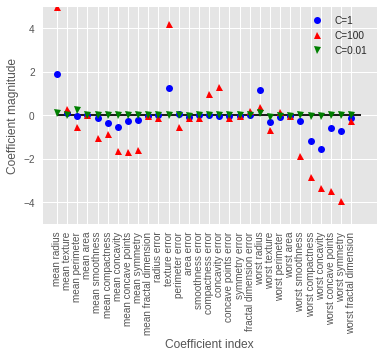

In [63]:
plt.plot(log.coef_.T, 'bo', label="C=1")
plt.plot(log100.coef_.T, 'r^', label="C=100")
plt.plot(log001.coef_.T, 'gv', label="C=0.01")
plt.xticks(range(breast.data.shape[1]), breast.feature_names, rotation=90)
plt.hlines(0, 0, breast.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()